# Dinamika regulatornih procesa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definisanje parametara
R0 = 15.0
L0 = 30.0
RL0 = 0.0

kon = 0.6
koff = 0.2
kdeg = 0.4

dt = 0.01
t_end = 30.0
t = np.arange(0.0, t_end + dt, dt)

# Nizovi
RL = np.zeros_like(t)
R = np.zeros_like(t)
L = np.zeros_like(t)

RL[0], R[0], L[0] = RL0, R0, L0

In [3]:
# Izračunavanje
for i in range(len(t) - 1):
    RL_i = RL[i]
    R_i = R0 - RL_i
    L_i = L0 - RL_i

    dRL_dt = kon * R_i * L_i - koff * RL_i

    RL_next = RL_i + dt * dRL_dt

    RL[i + 1] = RL_next
    R[i + 1] = R0 - RL_next
    L[i + 1] = L0 - RL_next

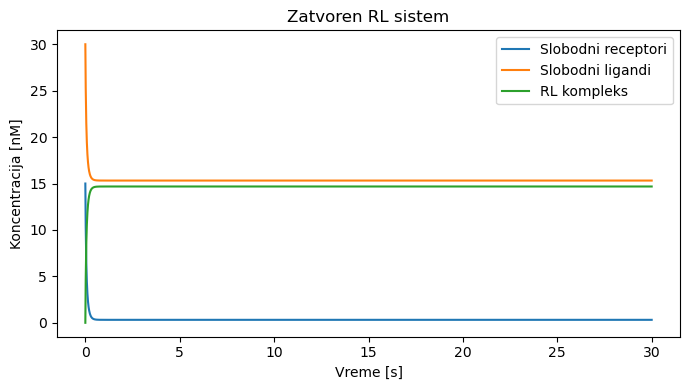

In [4]:
# Kreiranje grafika
plt.figure(figsize=(7,4))
plt.plot(t, R, label="Slobodni receptori")
plt.plot(t, L, label="Slobodni ligandi")
plt.plot(t, RL, label="RL kompleks")
plt.title("Zatvoren RL sistem")
plt.xlabel("Vreme [s]")
plt.ylabel("Koncentracija [nM]")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Model sa degradacijom
for i in range(len(t) - 1):
    R_i, L_i, RL_i = R[i], L[i], RL[i]

    dR_dt = koff * RL_i - kon * R_i * L_i
    dL_dt = koff * RL_i - kon * R_i * L_i
    dRL_dt = kon * R_i * L_i - RL_i * (koff + kdeg)

    R_next = R_i  + dt * dR_dt
    L_next = L_i  + dt * dL_dt
    RL_next = RL_i + dt * dRL_dt

    R[i+1], L[i+1], RL[i+1] = R_next, L_next, RL_next

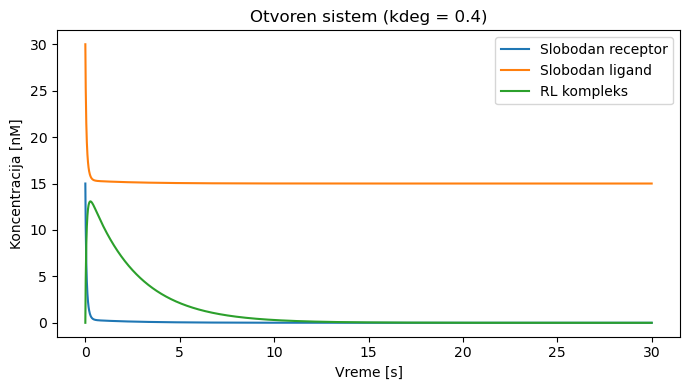

In [6]:
#Grafik
plt.figure(figsize=(7,4))
plt.plot(t, R, label="Slobodan receptor")
plt.plot(t, L, label="Slobodan ligand")
plt.plot(t, RL, label="RL kompleks")
plt.xlabel("Vreme [s]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Otvoren sistem (kdeg = {kdeg})")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Za kdeg = 0.04
kdeg = 0.04

for i in range(len(t) - 1):
    R_i, L_i, RL_i = R[i], L[i], RL[i]

    dR_dt = koff * RL_i - kon * R_i * L_i
    dL_dt = koff * RL_i - kon * R_i * L_i
    dRL_dt = kon * R_i * L_i - RL_i * (koff + kdeg)

    R_next = R_i + dt * dR_dt
    L_next = L_i + dt * dL_dt
    RL_next = RL_i + dt * dRL_dt

    R[i+1], L[i+1], RL[i+1] = R_next, L_next, RL_next

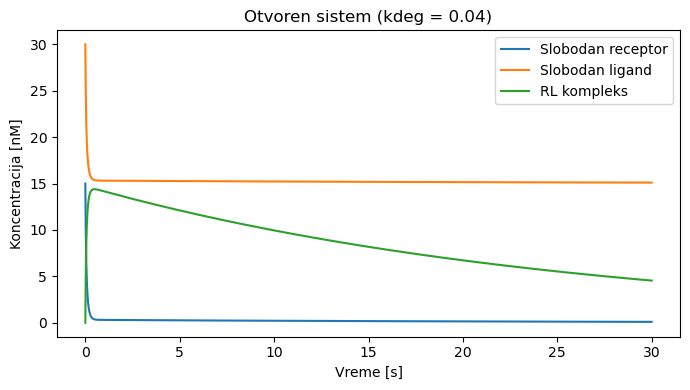

In [8]:
#Grafik
plt.figure(figsize=(7,4))
plt.plot(t, R, label="Slobodan receptor")
plt.plot(t, L, label="Slobodan ligand")
plt.plot(t, RL, label="RL kompleks")
plt.xlabel("Vreme [s]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Otvoren sistem (kdeg = {kdeg})")
plt.legend()
plt.tight_layout()
plt.show()

### **1. Uporedite tri slike. Koja je glavna odlika zatvorenog sistema? Pod kojim uslovima se može koristiti aproksimacija dinamike vezivanja liganda za receptor ravnotežnim stanjem? Zašto bismo u praksi uopšte uvodili ovakvu aproksimaciju?**

Zatvoren sistem vrlo brzo dostiže ravnotežu u kojoj se vrednosti koncentracija tri hemijske vrste više ne menjaju. Za razliku od njih, u otvorenim sistemima, ligand kog je bilo manje se, zbog velike brzine formiranja kompleksa, brzo "potroši" i čitav kompleks biva postepeno razgrađen. Niža vrednost $k_{deg}$ znači i sporiji gubitak R:L kompleksa iz sistema.

Aproksimacija ravnotežnog stanja se može primenjivati u onim situacijama kada je brzina razgradnje kompleksa zanemarljiva u poređenju sa brzinom formiranja i disocijacije kompleksa; takođe, potrebno je da se koncentracije liganda i receptora ne menjaju drastično prilikom uspostavljanja ravnoteže pri formiranju kompleksa. Ovo obično važi kada je ligand u velikom višku. Ovakve aproksimacije se uvode zato što značajno olakšavaju izučavanje sistema izbegavanjem primene složenih diferencijalnih jednačina sa velikim brojem parametara.

In [9]:
# DNK primer - podešavanje parametara
k1 = 0.3
k2 = 35
k3f = 0.3
k3r = 2
k4 = 3.5
k5 = 1.5

D0 = 30.0
M0 = 0.0 
P0 = 0.0
C0 = 0.0    

dt = 0.001
t_end = 10.0
t = np.arange(0.0, t_end + dt, dt)

D = np.zeros_like(t)
M = np.zeros_like(t)
P = np.zeros_like(t)
C = np.zeros_like(t)

D[0], M[0], P[0], C[0] = D0, M0, P0, C0

In [10]:
# Izračunavanje
for i in range(len(t) - 1):
    D_i, M_i, P_i, C_i = D[i], M[i], P[i], C[i]

    dD_dt = k3r * C_i - k3f * D_i * P_i
    dC_dt = k3f * D_i * P_i - k3r * C_i
    dM_dt = k1 * D_i - k4 * M_i
    dP_dt = k2 * M_i - k5 * P_i - k3f * D_i * P_i + k3r * C_i

    D_next = D_i + dt * dD_dt
    C_next = C_i + dt * dC_dt
    M_next = M_i + dt * dM_dt
    P_next = P_i + dt * dP_dt

    D[i+1], C[i+1], M[i+1], P[i+1] = D_next, C_next, M_next, P_next

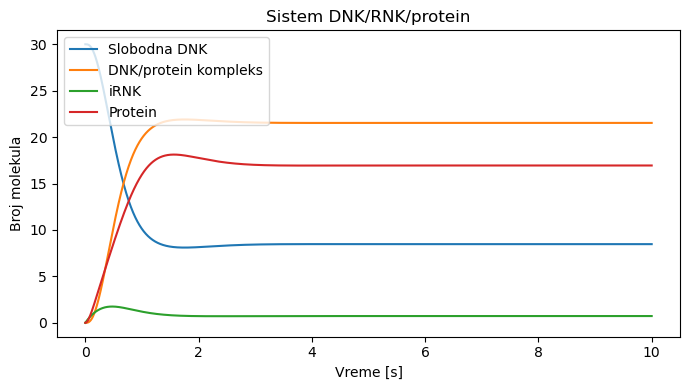

In [11]:
# Grafik
plt.figure(figsize=(7,4))
plt.plot(t, D, label="Slobodna DNK")
plt.plot(t, C, label="DNK/protein kompleks")
plt.plot(t, M, label="iRNK")
plt.plot(t, P, label="Protein")
plt.xlabel("Vreme [s]")
plt.ylabel("Broj molekula")
plt.title("Sistem DNK/RNK/protein")
plt.legend()
plt.tight_layout()
plt.show()

### **1. Zašto količina DNK opada sa vremenom?**

DNK je jedina komponenta sistema koja se ne obnavlja, već postoji u konstantnom broju od 30 molekula, a postojanje procesa koji uklanja slobodne DNK molekule i skladišti ih unutar kompleksa dovodi do toga da će DNK uvek biti na nižem nivou od početnog.